In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [77]:
raw_data = pd.read_csv("C:\\Users\\Admin\\Downloads\\1.04.+Real-life+example.csv")
raw_data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.000000,sedan,277,2.000000,Petrol,yes,1991,320
1,Mercedes-Benz,7900.000000,van,427,2.900000,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.000000,sedan,358,5.000000,Gas,yes,2003,S 500
3,Audi,23000.000000,crossover,240,4.200000,Petrol,yes,2007,Q7
4,Toyota,18300.000000,crossover,120,2.000000,Petrol,yes,2011,Rav 4


In [78]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [79]:
data=raw_data.drop(["Model"],axis=1) ##axis=1 mean columns, axis=0 mean rows

In [80]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## dealing with missing Values

In [81]:
data.isnull() 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [82]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [83]:
data_no_mv=data.dropna(axis=0)

In [84]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='Price', ylabel='Density'>

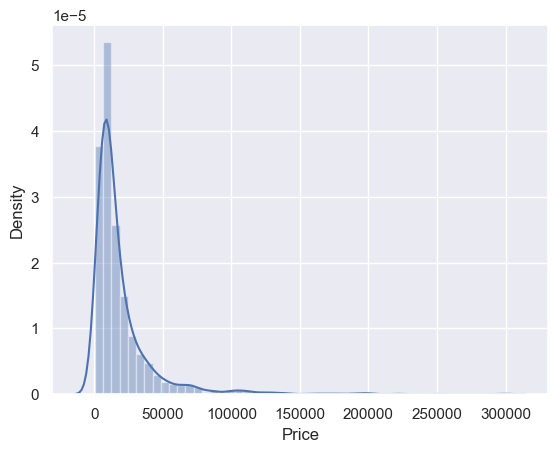

In [85]:
sns.distplot(data_no_mv["Price"])

In [86]:
q=data_no_mv["Price"].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Price', ylabel='Density'>

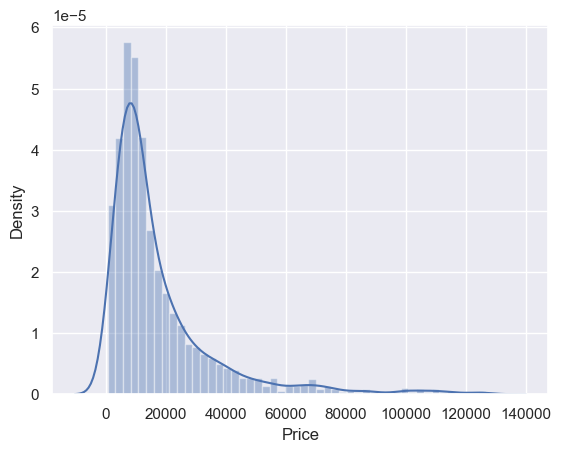

In [87]:
sns.distplot(data_1["Price"])

<Axes: xlabel='Mileage', ylabel='Density'>

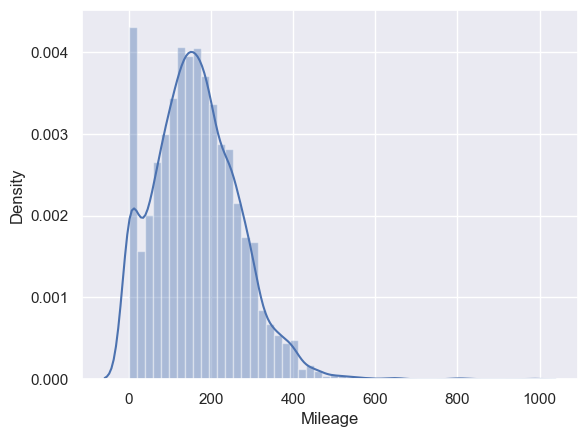

In [88]:
sns.distplot(data_1["Mileage"])

In [89]:
q=data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<Axes: xlabel='Mileage', ylabel='Density'>

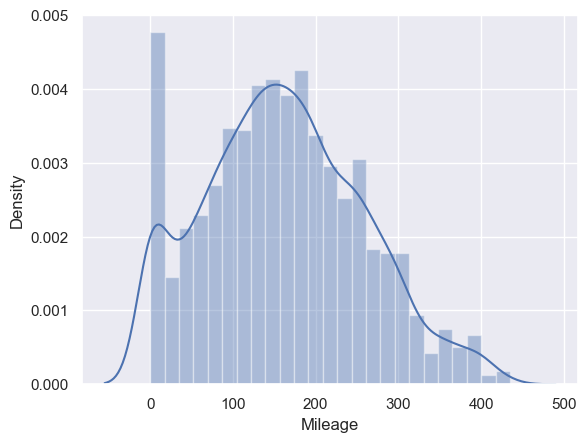

In [90]:
sns.distplot(data_2["Mileage"])

<Axes: xlabel='EngineV', ylabel='Density'>

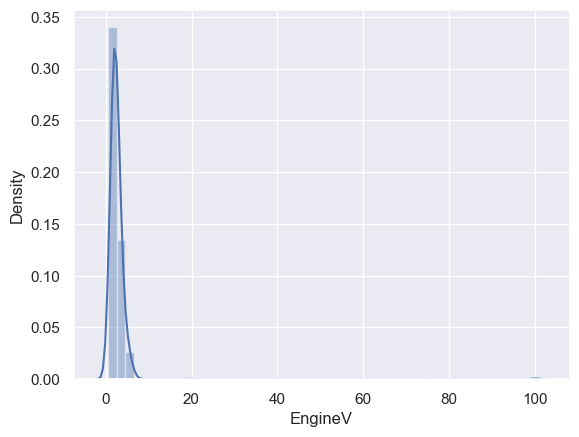

In [91]:
sns.distplot(data_no_mv["EngineV"])

<Axes: xlabel='Year', ylabel='Density'>

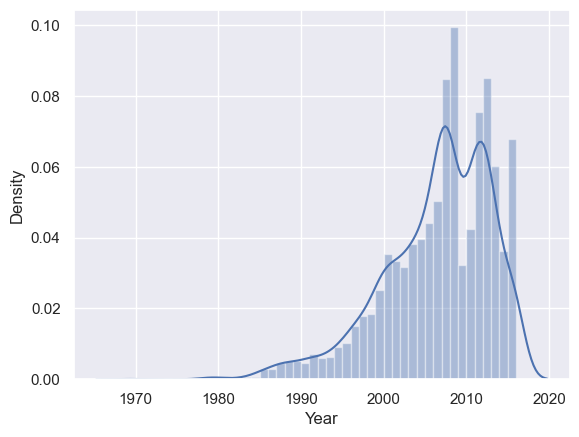

In [92]:
sns.distplot(data_2["Year"])

In [93]:
q=data_2["Year"].quantile(0.01)
data_3 = data_2[data_2["Year"]>q]
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3890,3890.000000,3890,3890.000000,3890.000000,3890,3890,3890.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1479,NaN,NaN,1814,3522,NaN
mean,NaN,18137.939874,NaN,160.753985,2.758735,NaN,NaN,2006.691774
std,NaN,19052.360866,NaN,95.595549,5.013666,NaN,NaN,6.107872
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


<Axes: xlabel='Year', ylabel='Density'>

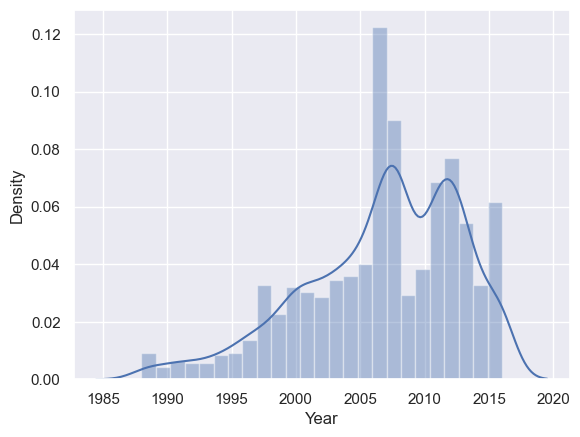

In [94]:
sns.distplot(data_3["Year"])

In [95]:
data_cleaned=data_3.reset_index(drop=True)

In [96]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3890,3890.000000,3890,3890.000000,3890.000000,3890,3890,3890.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1479,NaN,NaN,1814,3522,NaN
mean,NaN,18137.939874,NaN,160.753985,2.758735,NaN,NaN,2006.691774
std,NaN,19052.360866,NaN,95.595549,5.013666,NaN,NaN,6.107872
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.250000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


#check the OLS Assumptions

Text(0.5, 1.0, 'Price and Mileage')

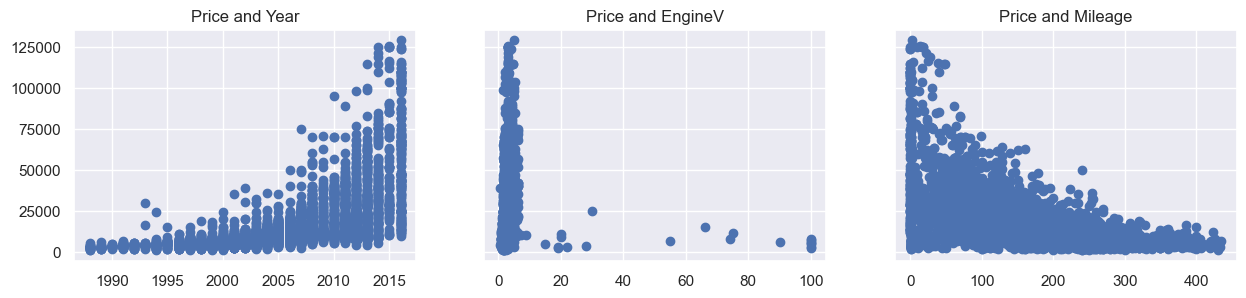

In [97]:
f,(ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")


<Axes: xlabel='EngineV', ylabel='Density'>

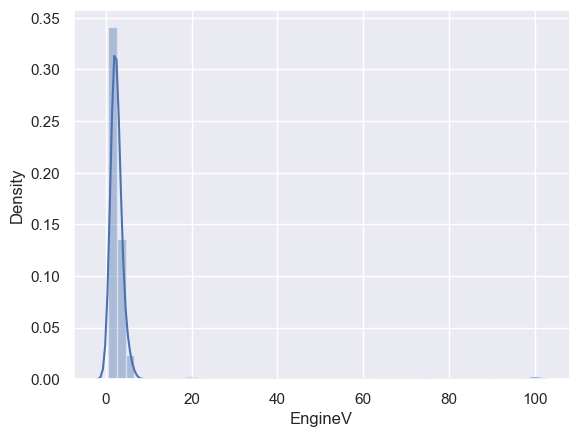

In [98]:
sns.distplot(data_cleaned["EngineV"])

In [99]:
data_cleaned1=data_cleaned[data_cleaned["EngineV"]<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

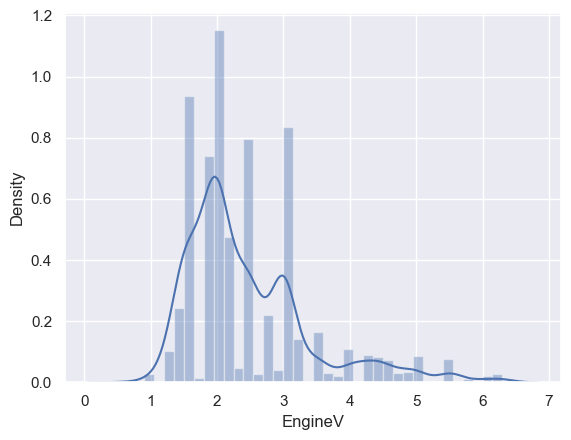

In [100]:
sns.distplot(data_cleaned1["EngineV"])

In [26]:
data_cleaned_f=data_cleaned1.reset_index(drop=True)

In [27]:
data_cleaned_f.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Text(0.5, 1.0, 'Price and Mileage')

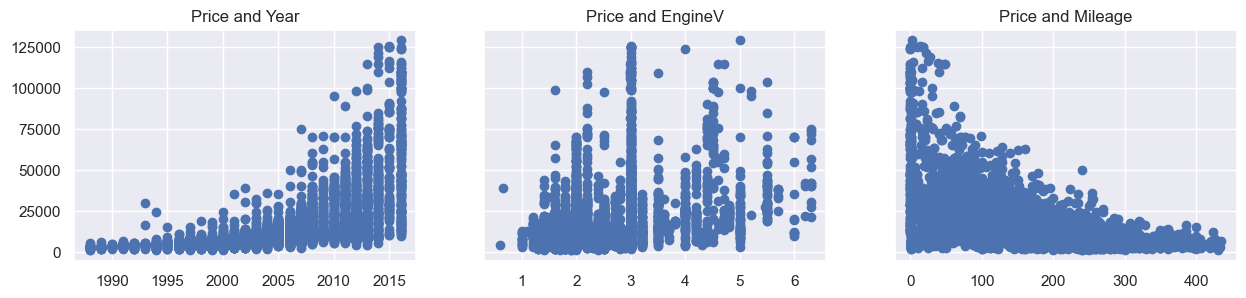

In [28]:
f,(ax4,ax5,ax6) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax4.scatter(data_cleaned_f["Year"],data_cleaned_f["Price"])
ax4.set_title("Price and Year")
ax5.scatter(data_cleaned_f["EngineV"],data_cleaned_f["Price"])
ax5.set_title("Price and EngineV")
ax6.scatter(data_cleaned_f["Mileage"],data_cleaned_f["Price"])
ax6.set_title("Price and Mileage")

In [29]:
log_price = np.log(data_cleaned_f["Price"])
data_cleaned_f["log_price"]=log_price

In [30]:
data_cleaned_f.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [31]:
data_cleaned_f

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


## Checking if the variables violate the Assumptions

Text(0.5, 1.0, 'log Price and Mileage')

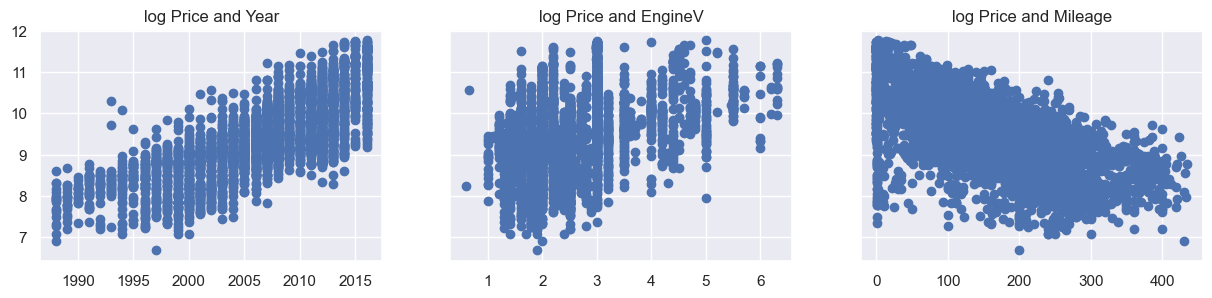

In [32]:
f,(ax4,ax5,ax6) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax4.scatter(data_cleaned_f["Year"],data_cleaned_f["log_price"])
ax4.set_title("log Price and Year")
ax5.scatter(data_cleaned_f["EngineV"],data_cleaned_f["log_price"])
ax5.set_title("log Price and EngineV")
ax6.scatter(data_cleaned_f["Mileage"],data_cleaned_f["log_price"])
ax6.set_title("log Price and Mileage")

In [33]:
data_cleaned_f=data_cleaned_f.drop(["Price"],axis=1)

In [34]:
data_cleaned_f

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned_f[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]= variables.columns


In [36]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [37]:
data_no_multicollinearity=data_cleaned_f.drop(["Year"],axis=1)

In [38]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Creating Dummy Variables

In [39]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [40]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [41]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols = [ 'log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [43]:
data_preprocessed=data_with_dummies[cols]

In [44]:
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [45]:
targets=data_preprocessed["log_price"]
inputs=data_preprocessed.drop(["log_price"],axis=1)

## Data scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [47]:
inputs_scaled=scaler.transform(inputs)

##Training and Testing

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test=train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [50]:
reg =LinearRegression()

In [51]:
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
y_hat=reg.predict(x_train)

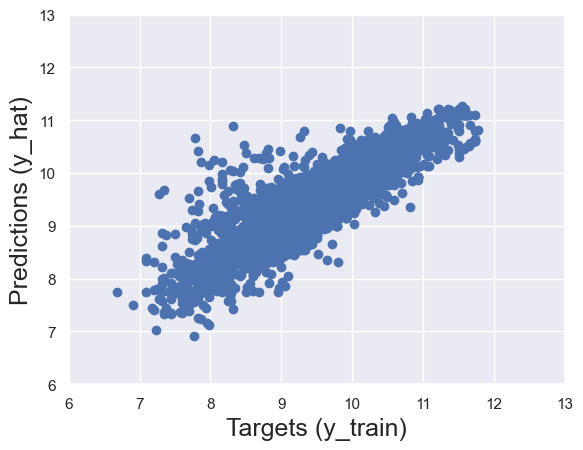

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residauls PDF')

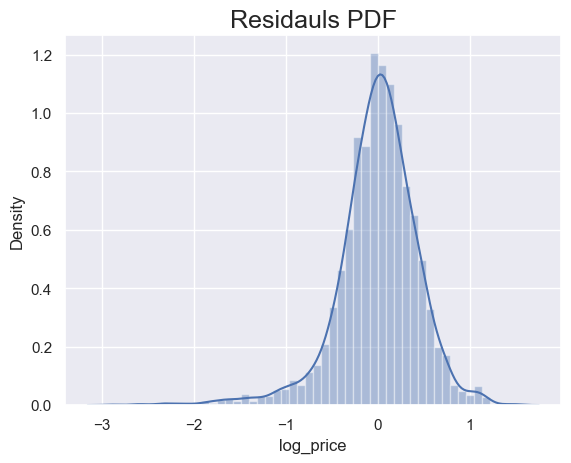

In [101]:
sns.distplot(y_train - y_hat)
plt.title("Residauls PDF", size =18)

In [102]:
reg.score(x_train, y_train)

0.744996578792662

In [103]:
reg.intercept_

9.415239458021299

In [104]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [105]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Weights interpretation

In [106]:
## continous Variables 
## positive value (as the feature increares in value, so do the log_price and price respectively)
## negative value (as the feature increases in value, the log_price and price decreases)

In [107]:
## Dummie varriables
##Positove Weight shows that respective category (Barand) is more expensive than the benchmark (Audi)
##Nenative Weight shows that respective category (Barand) is less expensive than the benchmark (Audi)


In [108]:
data_cleaned_f['Brand'].unique() 

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [109]:
data_cleaned_f['Body'].unique() 

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [110]:
data_cleaned_f['Engine Type'].unique() 

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

## Testing

In [111]:
y_hat_test=reg.predict(x_test)

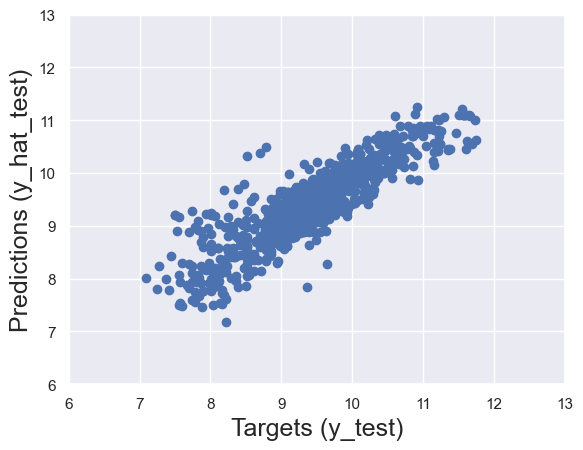

In [112]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() ## chaeck if it resembles a 45 degree line

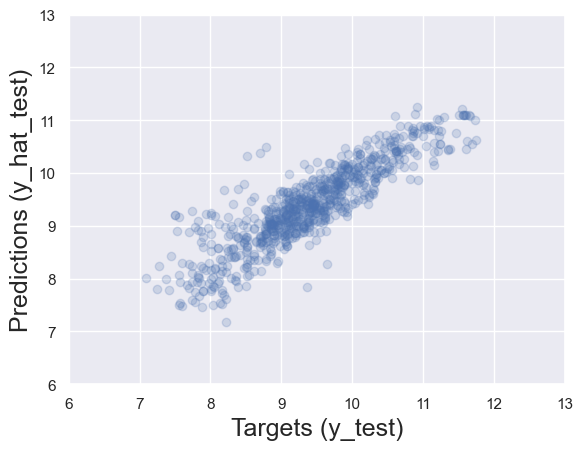

In [113]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() ## chaeck if it resembles a 45 degree line

In [114]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])## without log

In [115]:
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [116]:
y_test= y_test.reset_index(drop=True)## reseting the index
y_test.head()

0   7.740664
1   7.937375
2   7.824046
3   8.764053
4   9.121509
Name: log_price, dtype: float64

In [117]:
df_pf ["Targets"]=np.exp(y_test) ## without log

In [118]:
df_pf

,Prediction,Targets
0,10685.501696,2300.000000
1,3499.255242,2800.000000
2,7553.285218,2500.000000
3,7463.963017,6400.000000
4,11353.490075,9150.000000
5,21289.799394,20000.000000
6,20159.189144,38888.000000
7,20349.617702,16999.000000
8,11581.537864,12500.000000
9,33614.617349,41000.000000


In [72]:
df_pf ["Residuals"] = df_pf["Targets"]-df_pf["Prediction"]
df_pf

,Prediction,Targets,Residuals
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


In [73]:
df_pf ["Residuals%"] = np.absolute(df_pf["Residuals"]/df_pf["Targets"]*100)
df_pf

,Prediction,Targets,Residuals,Residuals%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [74]:
df_pf.describe()

,Prediction,Targets,Residuals,Residuals%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [75]:
pd.options.display.max_rows=999
pd.set_option("display.float_format", lambda x: "%2f" %x)
df_pf.sort_values(by=["Residuals%"])

,Prediction,Targets,Residuals,Residuals%
698,30480.847838,30500.000000,19.152162,0.062794
742,16960.310476,16999.000000,38.689524,0.227599
60,12469.207487,12500.000000,30.792513,0.246340
110,25614.137960,25500.000000,-114.137960,0.447600
367,42703.676996,42500.000000,-203.676996,0.479240
369,3084.687839,3100.000000,15.312161,0.493941
769,29651.726363,29500.000000,-151.726363,0.514327
272,9749.525108,9800.000000,50.474892,0.515050
714,23118.072456,22999.000000,-119.072456,0.517729
630,8734.578436,8800.000000,65.421564,0.743427
